# Data Science & Business Analytics Tasks
<font size=6>
    BY - SAGNICK BHAR


<font color='blue'>
<font size=4>

## TASK 3 - Exploratory Data Analysis - Retail


## Overview of the Problem set ##

**Problem Statement**: 
To perform ‘Exploratory Data Analysis’ on the dataset ‘SampleSuperstore’

## Importing Packages ##

First, let's import all the packages that will be needed during this assignment. 

In [2]:
# Importing the libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns

%matplotlib inline

In [3]:
# Loading the SampleSuperstore dataset ---

df=pd.read_csv('../input/superstore-dataset/SampleSuperstore.csv')
print('Data Successfully Imported')

df.head() # See the first 5 rows

Data Successfully Imported


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# To know number of rows and collumns
df.shape

(9994, 13)

In [5]:
# To see the summary statistics such as the percentiles, mean, std, max, count of the given dataset.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
cols = df.columns
cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# To check for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.shape

(9994, 13)

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Exploratory Data Analysis ##


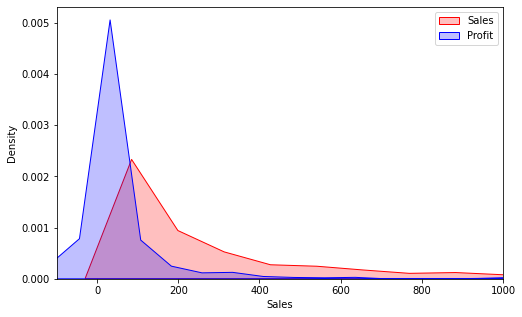

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw_adjust=.1)
sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw_adjust=.1)
plt.xlim([-100,1000])
plt.legend()

Profit is more than that of sale but there are quite some areas where profit could be increased.

## 1) Based on the Category ##


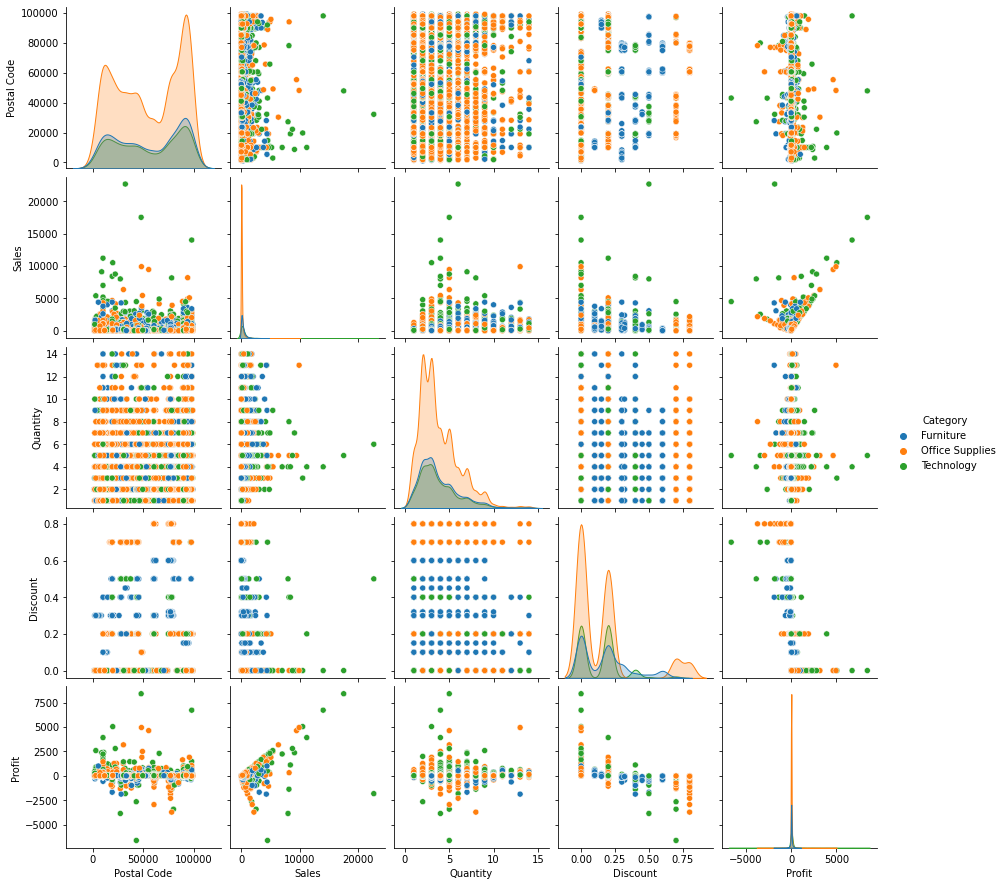

In [12]:
sns.pairplot(df,hue='Category')

## 2) Based on Region ##


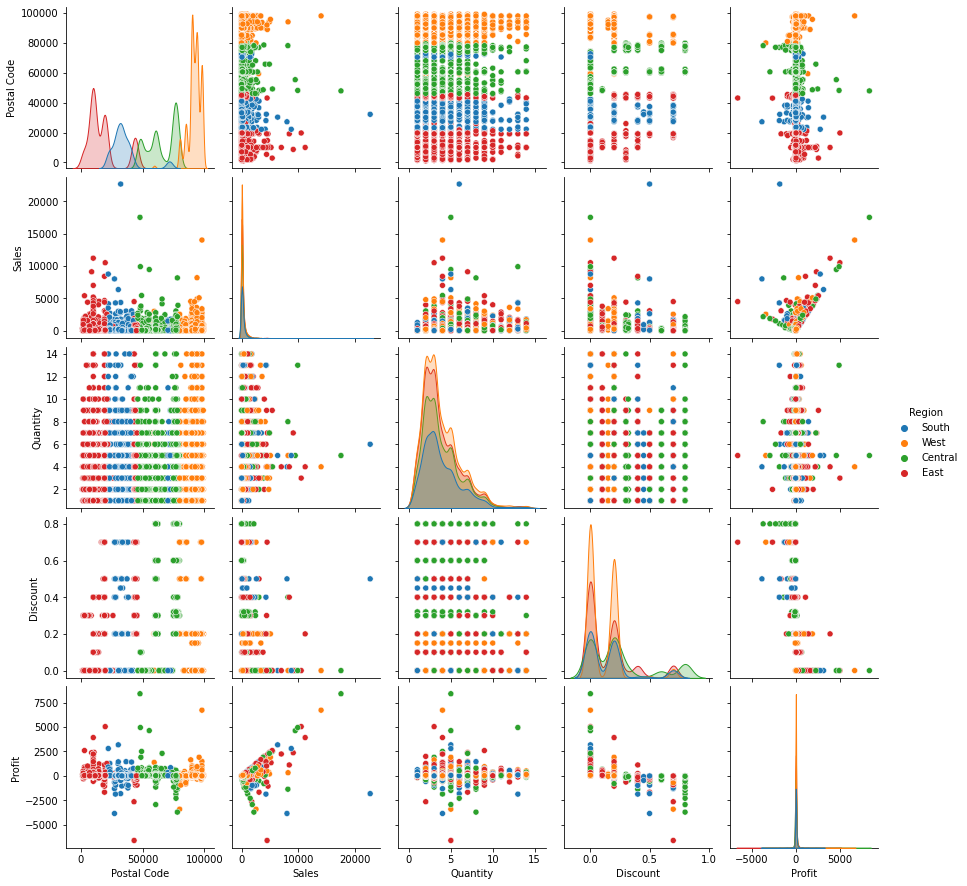

In [13]:
sns.pairplot(df,hue='Region')

## 3) Based on the segment ##


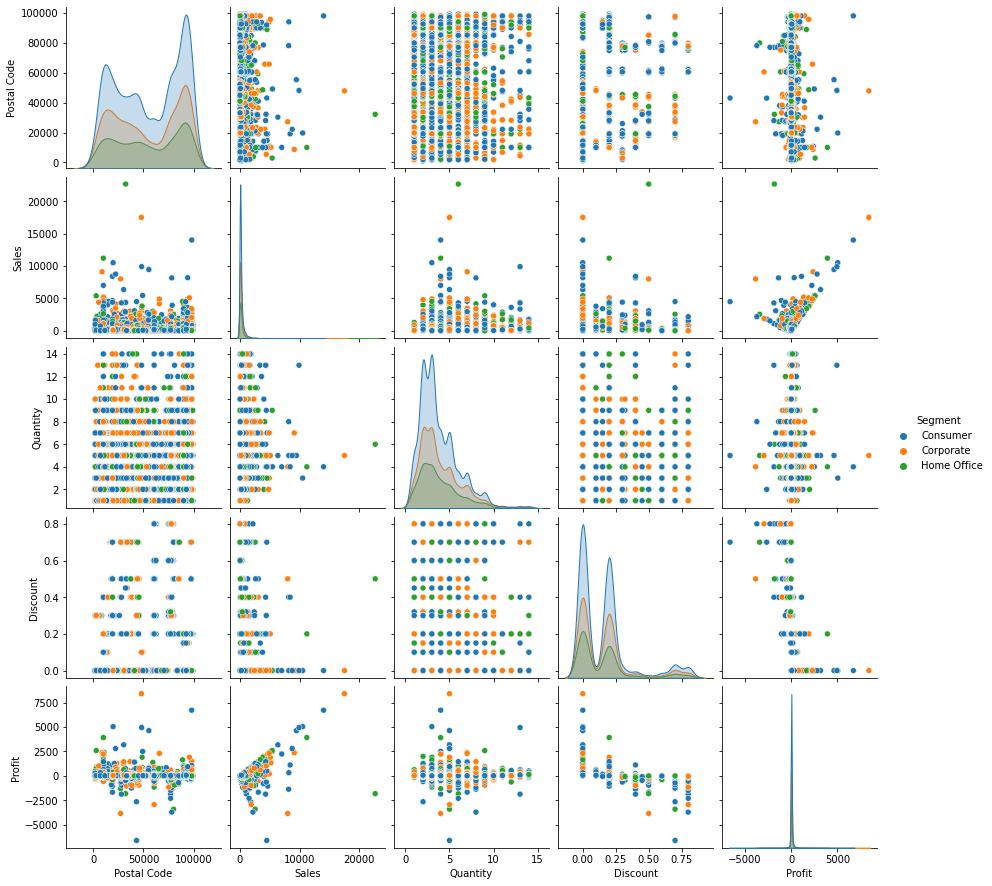

In [14]:
sns.pairplot(df,hue='Segment')

We can say in terms of Segment Home Office has the highest profit margin followed by Corporate and Consumer.

## 4 Based on the Ship Mode ##


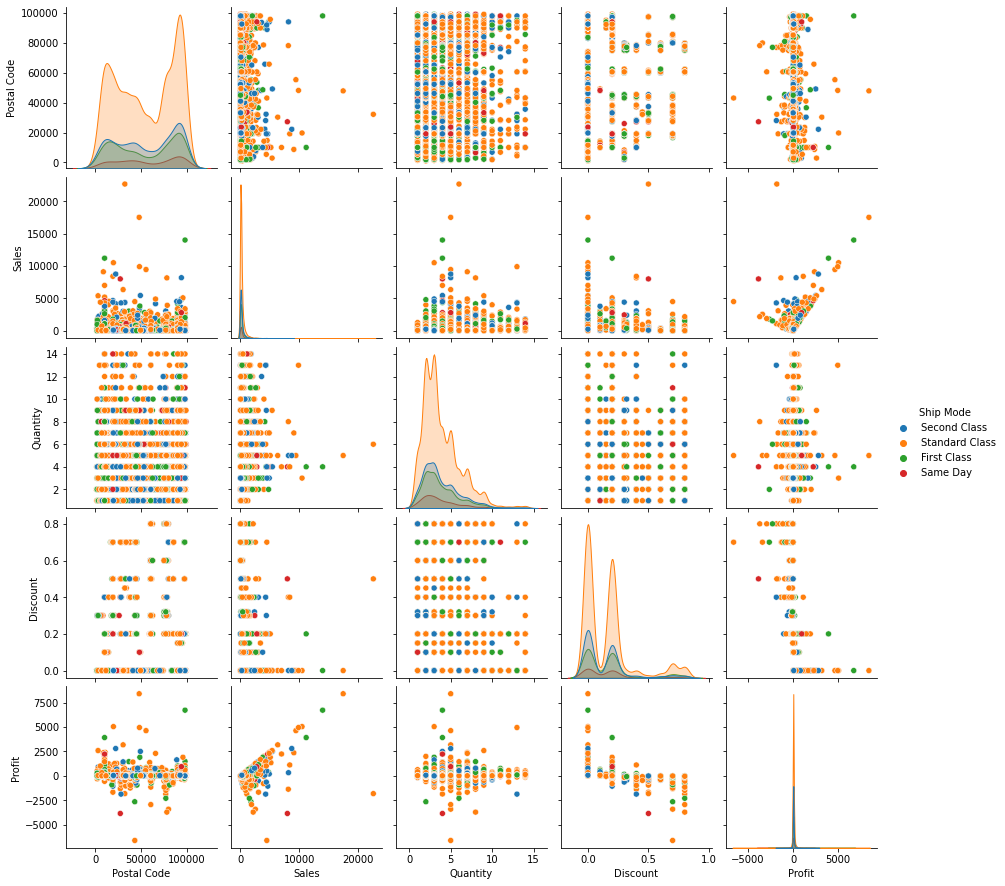

In [15]:
sns.pairplot(df,hue='Ship Mode')

•	Sales is high for Same day ship

•	Profit and Discount is high in First Class

## Let's Look At How Each Region Performs on the basis of Profit ##


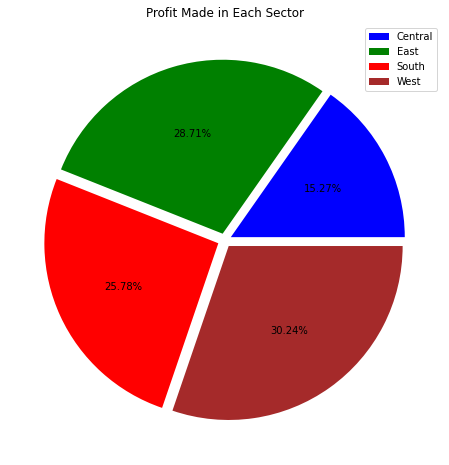

,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,65340.572536,215.772661,3.779595,0.240353,17.092709
1,East,17616.466994,238.336110,3.728230,0.145365,32.135808
2,South,34490.772840,241.803645,3.832716,0.147253,28.857673
3,West,91707.696534,226.493233,3.829535,0.109335,33.849032


In [17]:
fig = plt.figure(figsize=(10,8))
region = df.groupby('Region').mean().reset_index()
plt.pie(region['Profit'],autopct='%1.2f%%',explode = (0.04, 0.04, 0.04,0.04),colors = ('blue','green','red','brown'))
plt.legend(region['Region'])
plt.title('Profit Made in Each Sector')
plt.show()
region

Region WEST : Highest Profit

In [18]:
df.groupby(['Region','Category']).mean()

Postal Code       Sales  Quantity  Discount  \
Region  Category                                                        
Central Furniture        65486.453222  340.534644  3.798337  0.297380   
        Office Supplies  65275.734880  117.458801  3.803797  0.252743   
        Technology       65393.026190  405.753124  3.676190  0.133095   
East    Furniture        17317.247920  346.574383  3.683860  0.154077   
        Office Supplies  17401.548481  120.044425  3.774533  0.142932   
        Technology       18640.338318  495.278469  3.629907  0.143364   
South   Furniture        34552.117470  353.309289  3.888554  0.121536   
        Office Supplies  34243.389950  126.282727  3.819095  0.167437   
        Technology       35261.351536  507.753952  3.815700  0.107850   
West    Furniture        91680.442716  357.302325  3.813296  0.131400   
        Office Supplies  91769.716921  116.422377  3.813917  0.093358   
        Technology       91543.449082  420.687533  3.898164  0.133890   

                            Profit  
Region  Category                    
Central Furniture        -5.968918  
        Office Supplies   6.244712  
        Technology       80.231981  
East    Furniture         5.068496  
        Office Supplies  23.957114  
        Technology       88.714084  
South   Furniture        20.395199  
        Office Supplies  20.086827  
        Technology       68.231506  
West    Furniture        16.272914  
        Office Supplies  27.733183  
        Technology       73.962687

Looking at how each sector performs in each region, it is a similar split in each region regarding the Technical sector pulling ahead in all regions with Office Supplies and Furniture lagging behind by a good amount with the latter lagging even more that the former.

In the central region improvement can be made in the furniture sector which seems to be their only drawback.

## Lets see the Top 10 States in terms of Profit ##


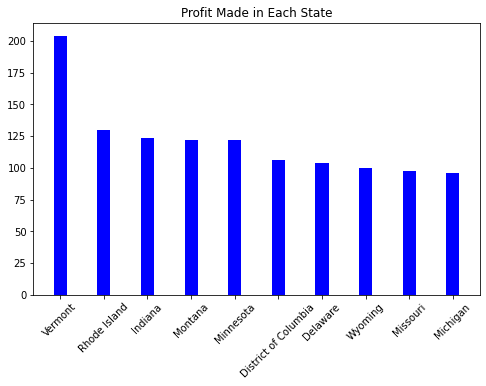

,State,Postal Code,Sales,Quantity,Discount,Profit
43,Vermont,5408.000000,811.760909,4.545455,0.000000,204.088936
37,Rhode Island,2908.535714,404.070643,3.553571,0.021429,130.100523
12,Indiana,46923.503356,359.431946,3.879195,0.000000,123.375411
24,Montana,59491.733333,372.623467,3.733333,0.066667,122.221900
21,Minnesota,55418.247191,335.541011,3.719101,0.000000,121.608847
7,District of Columbia,20016.000000,286.502000,4.000000,0.000000,105.958930
6,Delaware,19755.250000,285.948635,3.822917,0.006250,103.930988
48,Wyoming,82001.000000,1603.136000,4.000000,0.200000,100.196000
23,Missouri,65126.696970,336.441667,3.818182,0.000000,97.518341
20,Michigan,48455.305882,299.096525,3.709804,0.007059,95.934069


In [19]:
fig = plt.figure(figsize=(8,5))
state = df.groupby('State').mean().reset_index().sort_values(by = 'Profit',ascending=False).head(10)
plt.bar(state['State'],state['Profit'],width = 0.3,color = 'blue')
plt.xticks(rotation = 45)
plt.title('Profit Made in Each State')
plt.show()
state

## Let's Look At How Each Sector Performs in terms of Profit ##


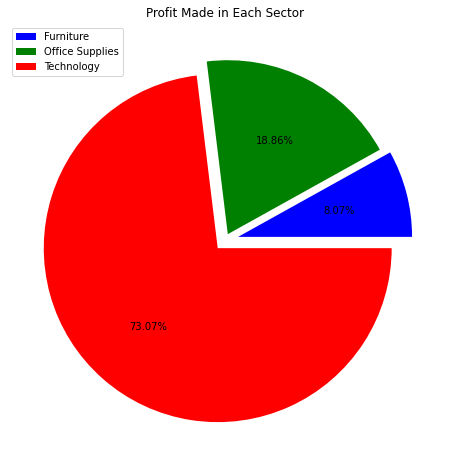

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,55726.556341,349.834887,3.785007,0.173923,8.699327
1,Office Supplies,54890.951211,119.324101,3.801195,0.157285,20.327050
2,Technology,55551.572279,452.709276,3.756903,0.132323,78.752002


In [20]:
fig = plt.figure(figsize=(10,8))
cate = df.groupby('Category').mean().reset_index()
plt.pie(cate['Profit'],autopct='%1.2f%%',explode = (0.08, 0.04, 0.06),colors = ('blue','green','red'))
plt.legend(cate['Category'])
plt.title('Profit Made in Each Sector')
plt.show()
cate

## Let's Look At How Each Sector Performs in terms of Loss ##


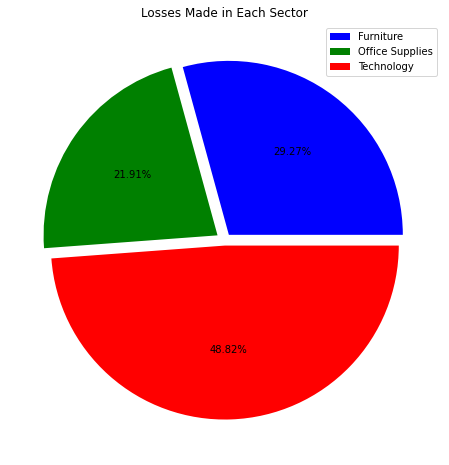

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
1,Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
2,Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


In [34]:

fig = plt.figure(figsize=(10,8))
cate = df[df['Profit']<0].groupby('Category').mean().reset_index()
plt.pie(cate['Profit']*-1,autopct='%1.2f%%',explode = (0.04, 0.05, 0.03),colors = ('blue','green','red'))
plt.legend(cate['Category'])
plt.title('Losses Made in Each Sector')
plt.show()
cate

## Distribution of the data using the plot ##


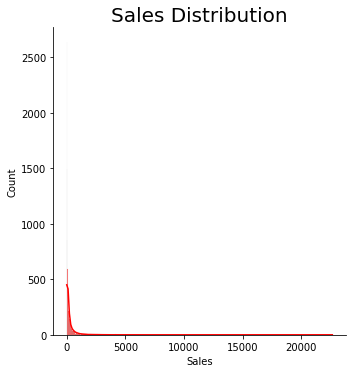

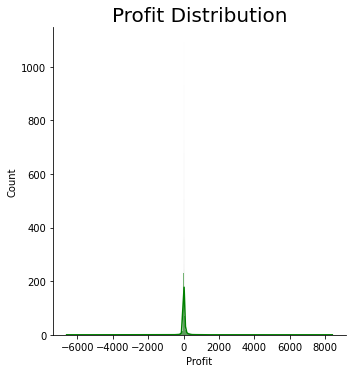

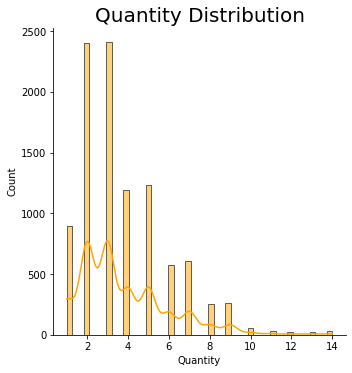

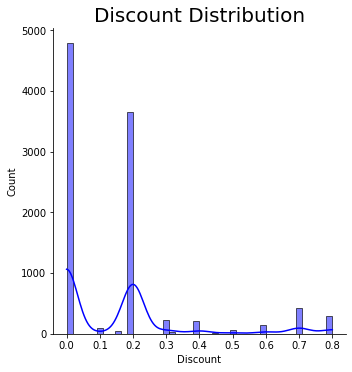

In [35]:
sns.displot(data = df['Sales'], color = 'red', kde=True)
plt.title('Sales Distribution', fontsize = 20)

sns.displot(data = df['Profit'], color = 'green', kde=True)
plt.title('Profit Distribution', fontsize = 20)

sns.displot(data = df['Quantity'], color = 'orange', kde=True)
plt.title('Quantity Distribution', fontsize = 20)

sns.displot(data = df['Discount'], color = 'blue', kde=True)
plt.title('Discount Distribution', fontsize = 20)


plt.show()

## Statewise Deal Analysis ##


In [23]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [24]:
df1 = df['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

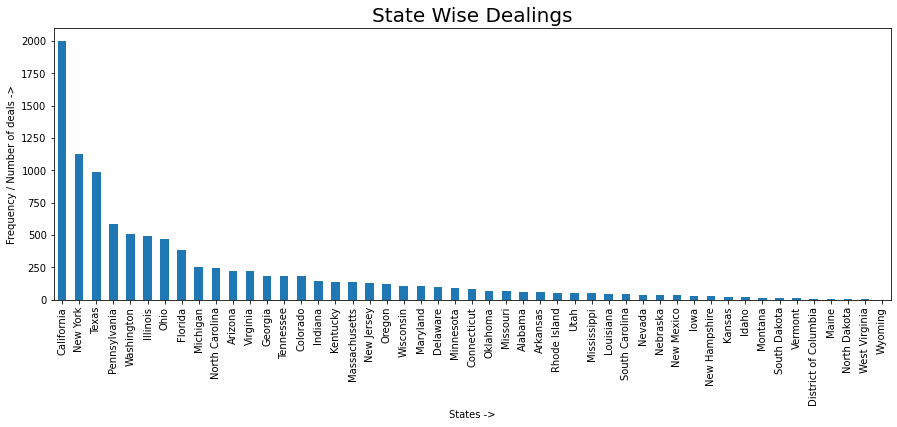

In [38]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals ->')
plt.xlabel('States ->')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 state where deals are Highest -

1. Califonia
2. New York
3. Texas

Wyoming: Lowest Number of deals

In [26]:
df['State'].value_counts().mean()

203.9591836734694

Average number of deals per state is 204.

## Citywise Deal Analysis ##


In [27]:
df2 = df['City'].value_counts()
df2=df2.head(50)

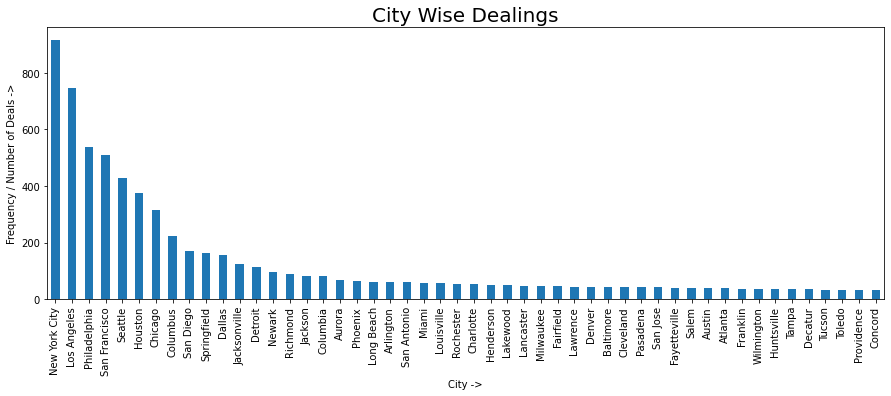

In [39]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of Deals ->')
plt.xlabel('City ->')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 city where deals are Highest -

1. New York City
2. Los Angeles
3. Philadelphia

In [29]:
df['City'].value_counts().mean()

18.821092278719398

Average number of deals per city is 19.

# Sub-Category wise Sales, Profit and Discount #


In [30]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


## 1) BASED ON THE SALES ##


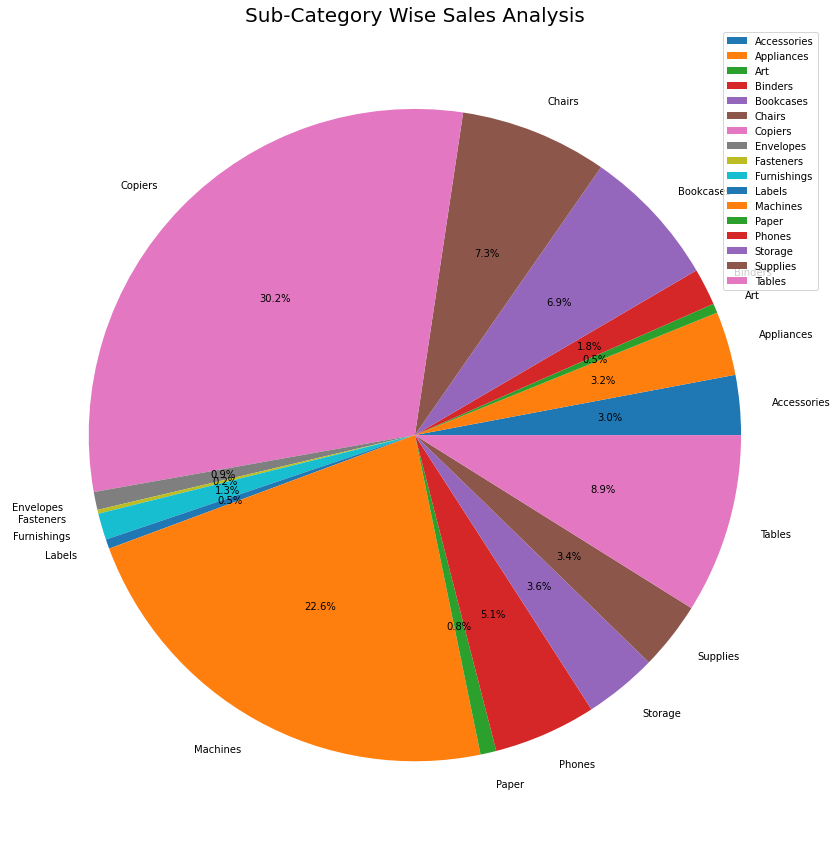

In [31]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

Copier then Machine have High sales.

## 2) BASED ON DISCOUNT ##


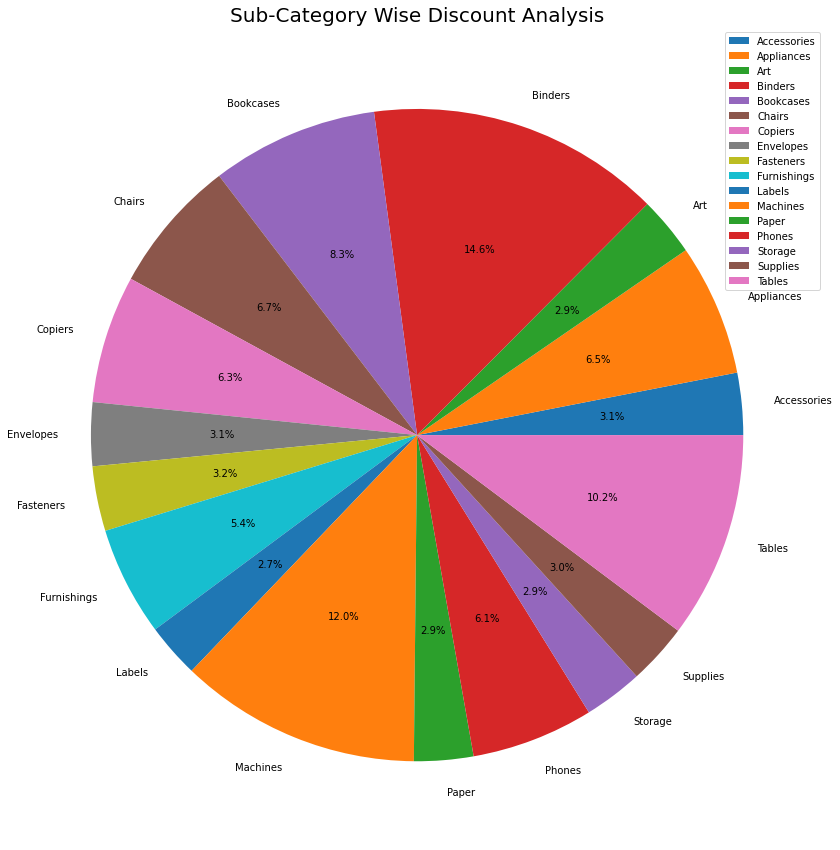

In [32]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

Binders , Machines and then tables have high Discount.

## 3) BASED ON THE PROFIT ##


<AxesSubplot:xlabel='Sub-Category'>

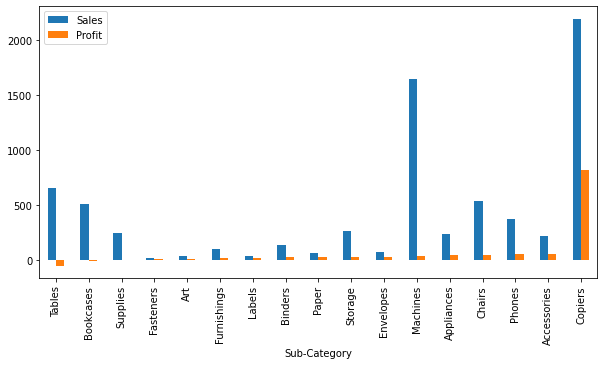

In [33]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar', figsize= (10,5), label=['Avg Sales Price($)','Profit($)'])

Copier gets highest Profit as well.

## RESULT AND CONCLUSION ##

* Profit is more than that of sale but there are quite some areas where profit could be increased.
* We can say in terms of Segment Home Office has the highest profit margin followed by Corporate and Consumer.
* On the basis of ship mode - Sales is high for Same day ship.
                            - Profit and Discount is high in First Class
                            
* The Region WEST has the Highest Profit & Central lowest.
* Looking at how each sector performs in each region, it is a similar split in each region regarding the Technical sector pulling ahead in all   regions with Office Supplies and Furniture lagging behind by a good amount with the latter lagging even more that the former.
* The top 3 States in terms of Profit are - Vermont, Rhode Island & then Indiana.
* Sector Performs in terms of Profit - Technology, Office Supplies & then Furniture.
* Sector Performs in terms of Loss - Technology, Furniture & then Office Supplies.
* Here is top 3 state where deals are Highest.
1. Califonia 
2. New York 
3. Texas
*  Wyoming state: Lowest Number of deal
* Average number of deal per state is 204.
* Here is top 3 city where deals are Highest. 
1. New York City 
2. Los Angeles 
3. Philadelphia
* Concord city: Lowest Number of deal
* Average number of deal per city is 19.
* Sub-category: Copier: High Profit & sales
* Sub-category: Binders , Machines and then tables have high Discount.
